# Problem statement

1. Expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:
(a) pre-process the data by scaling/standardizing the 8 columns 

(b) Split the entire dataset into three parts instead of two as we currently do. One is train, two is 
validation, and then a test set. Build DNN model with train data, tune hyper-parameters with
validation data, and finally evaluate performance on the test data.

(c) Make Epoch versus train set accuracy, and validation set accuracy 

(d) Report results using nice ROC curves, report AUC values. Feel free to use code form our course, 
or from elsewhere


# Import necessary packages

In [1]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

Using TensorFlow backend.


In [2]:
my_df= pd.read_csv('C:/Users/Home/Desktop/Data science (Summer)/Assignments/Assignment No 3/diabetes.csv')


In [3]:
print(my_df.shape)
my_df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Pre-process data, train-test split

In [4]:
my_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Splitting data in Training Validation and Testing data set

In [6]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

mydf_train_valid,mydf_test= mydf_splitter(my_df,652)
print(mydf_train_valid.shape,mydf_test.shape)


(652, 9) (116, 9)


In [7]:
Y = mydf_train_valid["Outcome"]
X = mydf_train_valid.drop(["Outcome"],axis = 1)
print(X.shape,Y.shape)

(652, 8) (652,)


# Scaling data from -1 to 1

In [8]:

scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
print(X.shape)
X.head(2)

(652, 8)


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.658967,0.861791,0.175057,0.919552,-0.687306,0.227557,0.439358,1.457947
1,-0.831825,-1.088241,-0.131489,0.543030,-0.687306,-0.662468,-0.375149,-0.173437


# Splitting Data into Train and Validation set

In [9]:

X_train,X_valid = mydf_splitter(X,420)
Y_train,Y_valid = mydf_splitter(Y,420)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(420, 8) (232, 8) (420,) (232,)


# Build and compile a deep learning model

In [10]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(4, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  """
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Ker

# Compile the DNN

In [11]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score= list()
accuracy_list=list()
epoch=list()
batch= list()

# Fit the DNN with your train data

In [12]:

model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=100, batch_size=5)
for epoch in range (5,20):
    for batch in range(5,7):
        model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=epoch, batch_size=batch)
        scores = model.evaluate(X_valid, Y_valid)
        score.append(scores)
        print ("Accuracy: %.2f%%" %(scores[1]*100))

Instructions for updating:
Use tf.cast instead.


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 420 samples, validate on 232 samples
Epoch 1/100
420/420 [==============================] - 2s 6ms/step - loss: 0.6920 - acc: 0.5619 - val_loss: 0.6853 - val_acc: 0.7371
Epoch 2/100
420/420 [==============================] - 0s 426us/step - loss: 0.6881 - acc: 0.6143 - val_loss: 0.6785 - val_acc: 0.7371
Epoch 3/100
420/420 [==============================] - 0s 466us/step - loss: 0.6847 - acc: 0.6143 - val_loss: 0.6713 - val_acc: 0.7371
Epoch 4/100
420/420 [==============================] - 0s 396us/step - loss: 0.6819 - acc: 0.6143 - val_loss: 0.6648 - val_acc: 0.7371
Epoch 5/100
420/420 [==============================] - 0s 459us/step - loss: 0.6795 - acc: 0.6143 - val_loss: 0.6588 - val_acc: 0.7371
Epoch 6/100
420/420 [==============================] - ETA: 0s - loss: 0.6773 - acc: 0.616 - 0s 429us/step - loss: 0.6774 - acc: 0.6143 - val_loss: 0.6543 - val_acc: 0.7371
Epoch 7/100
420/420 [==============================] - 0s 436us/step - loss: 0.6758 - acc: 0.6143 - val_loss

420/420 [==============================] - 0s 403us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 61/100
420/420 [==============================] - 0s 400us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6101 - val_acc: 0.7371
Epoch 62/100
420/420 [==============================] - 0s 401us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 63/100
420/420 [==============================] - 0s 399us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 64/100
420/420 [==============================] - 0s 442us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 65/100
420/420 [==============================] - 0s 458us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 66/100
420/420 [==============================] - 0s 488us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6102 - val_acc: 0.7371
Epoch 67/100
420/420 [==============================] - 0s 51

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 418us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 2/5
420/420 [==============================] - 0s 427us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 3/5
420/420 [==============================] - 0s 414us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 4/5
420/420 [==============================] - 0s 458us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 5/5
232/232 [==============================] - 0s 48us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/5
420/420 [==============================] - 0s 404us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6101 - val_acc: 0.7371
Epoch 2/5


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 530us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/5
420/420 [==============================] - 0s 343us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 4/5
420/420 [==============================] - 0s 344us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/5
232/232 [==============================] - 0s 23us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/6
420/420 [==============================] - 0s 396us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 2/6


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 433us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 3/6
420/420 [==============================] - 0s 433us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 4/6
420/420 [==============================] - 0s 424us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 5/6
420/420 [==============================] - 0s 423us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 6/6
232/232 [==============================] - 0s 68us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/6
420/420 [==============================] - 0s 398us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 2/6
  6/420 [..............................] - ETA: 0s - loss: 0.5655 - acc: 0.8333

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 381us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 3/6
420/420 [==============================] - 0s 357us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 4/6
420/420 [==============================] - 0s 363us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 5/6
420/420 [==============================] - 0s 391us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/6
232/232 [==============================] - 0s 61us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/7
295/420 [====================>.........] - ETA: 0s - loss: 0.6829 - acc: 0.5797

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 478us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 2/7
420/420 [==============================] - 0s 470us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 3/7
420/420 [==============================] - 0s 448us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 4/7
420/420 [==============================] - 0s 454us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/7
420/420 [==============================] - 0s 429us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 6/7
420/420 [==============================] - 0s 439us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 7/7
232/232 [==============================] - 0s 121us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/7
108/420 [======>.......................] - ETA: 0s - loss: 0.6683 - acc:

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 624us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 2/7
420/420 [==============================] - 0s 363us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/7
420/420 [==============================] - 0s 353us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 4/7
420/420 [==============================] - 0s 363us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/7
420/420 [==============================] - 0s 395us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 6/7
420/420 [==============================] - 0s 395us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 7/7
232/232 [==============================] - 0s 34us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/8
285/420 [===================>..........] - ETA: 0s - loss: 0.6768 - acc: 

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 453us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 2/8
420/420 [==============================] - 0s 437us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 3/8
420/420 [==============================] - 0s 445us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 4/8
420/420 [==============================] - 0s 422us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/8
420/420 [==============================] - 0s 453us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/8
420/420 [==============================] - 0s 422us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 7/8
420/420 [==============================] - 0s 470us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 8/8
232/232 [==============================] - 0s 41us/step
Accuracy: 73.

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 380us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 3/8
420/420 [==============================] - 0s 388us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/8
420/420 [==============================] - 0s 375us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/8
420/420 [==============================] - 0s 366us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 6/8
420/420 [==============================] - 0s 381us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 7/8
420/420 [==============================] - 0s 375us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 8/8
232/232 [==============================] - 0s 39us/step
Accuracy: 73.71%
Train on 420 samples, validate on 232 samples
Epoch 1/9
420/420 [==============================] - 0s 413us/step - loss: 0.6668 -

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 2/9
420/420 [==============================] - 0s 469us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 3/9
420/420 [==============================] - 0s 415us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 4/9
420/420 [==============================] - 0s 412us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/9
420/420 [==============================] - 0s 406us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/9
420/420 [==============================] - 0s 437us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 7/9
420/420 [==============================] - 0s 443us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 8/9
420/420 [==============================] - 0s 502us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 9/9
232/232 [==============================] - 0s 53us/step
Acc

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 331us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 3/9
420/420 [==============================] - 0s 334us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 4/9
420/420 [==============================] - 0s 374us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/9
420/420 [==============================] - 0s 584us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/9
420/420 [==============================] - 0s 543us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 7/9
420/420 [==============================] - 0s 554us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 8/9
420/420 [==============================] - 0s 406us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 9/9
232/232 [==============================] - 0s 50us/step
Accuracy: 73.

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 488us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 2/10
420/420 [==============================] - 0s 500us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 3/10
420/420 [==============================] - 0s 551us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/10
420/420 [==============================] - 0s 553us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/10
420/420 [==============================] - 0s 527us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/10
420/420 [==============================] - 0s 537us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 7/10
420/420 [==============================] - 0s 497us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 8/10
420/420 [==============================] - 0s 449us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 382us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 3/10
420/420 [==============================] - 0s 384us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/10
420/420 [==============================] - 0s 375us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 5/10
420/420 [==============================] - 0s 388us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 6/10
420/420 [==============================] - 0s 367us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 7/10
420/420 [==============================] - 0s 383us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 8/10
420/420 [==============================] - 0s 375us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 9/10
420/420 [==============================] - 0s 378us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 487us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 2/11
420/420 [==============================] - 0s 433us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 3/11
420/420 [==============================] - 0s 458us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6101 - val_acc: 0.7371
Epoch 4/11
420/420 [==============================] - 0s 455us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 5/11
420/420 [==============================] - 0s 456us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 6/11
420/420 [==============================] - 0s 538us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 7/11
420/420 [==============================] - 0s 453us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 8/11
420/420 [==============================] - 0s 468us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 370us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 3/11
420/420 [==============================] - 0s 390us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 4/11
420/420 [==============================] - 0s 419us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 5/11
420/420 [==============================] - 0s 381us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/11
420/420 [==============================] - 0s 383us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 7/11
420/420 [==============================] - 0s 386us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 8/11
420/420 [==============================] - 0s 384us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 9/11
420/420 [==============================] - 0s 384us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 454us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6101 - val_acc: 0.7371
Epoch 2/12
420/420 [==============================] - 0s 460us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/12
420/420 [==============================] - 0s 517us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/12
420/420 [==============================] - 0s 468us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 5/12
420/420 [==============================] - 0s 472us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/12
420/420 [==============================] - 0s 461us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 7/12
420/420 [==============================] - 0s 474us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 8/12
420/420 [==============================] - 0s 484us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 364us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/12
420/420 [==============================] - 0s 364us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 4/12
420/420 [==============================] - 0s 391us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 5/12
420/420 [==============================] - 0s 362us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 6/12
420/420 [==============================] - 0s 400us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 7/12
420/420 [==============================] - 0s 378us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 8/12
420/420 [==============================] - 0s 382us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 9/12
420/420 [==============================] - 0s 369us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 447us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 2/13
420/420 [==============================] - 0s 463us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/13
420/420 [==============================] - 0s 449us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 4/13
420/420 [==============================] - 0s 448us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/13
420/420 [==============================] - 0s 435us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 6/13
420/420 [==============================] - 0s 475us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 7/13
420/420 [==============================] - 0s 445us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 8/13
420/420 [==============================] - 0s 462us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 380us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/13
420/420 [==============================] - 0s 389us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 4/13
420/420 [==============================] - 0s 415us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 5/13
420/420 [==============================] - 0s 384us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/13
420/420 [==============================] - 0s 375us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 7/13
420/420 [==============================] - 0s 379us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 8/13
420/420 [==============================] - 0s 373us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 9/13
420/420 [==============================] - 0s 377us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 449us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 2/14
420/420 [==============================] - 0s 427us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 3/14
420/420 [==============================] - 0s 469us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 4/14
420/420 [==============================] - 0s 444us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/14
420/420 [==============================] - 0s 457us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/14
420/420 [==============================] - 0s 445us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 7/14
420/420 [==============================] - 0s 439us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 8/14
420/420 [==============================] - 0s 476us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 393us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 3/14
420/420 [==============================] - 0s 379us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 4/14
420/420 [==============================] - 0s 378us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/14
420/420 [==============================] - 0s 390us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/14
420/420 [==============================] - 0s 380us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 7/14
420/420 [==============================] - 0s 394us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 8/14
420/420 [==============================] - 0s 384us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 9/14
420/420 [==============================] - 0s 384us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 428us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 2/15
420/420 [==============================] - 0s 459us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/15
420/420 [==============================] - 0s 470us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/15
420/420 [==============================] - 0s 444us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 5/15
420/420 [==============================] - 0s 449us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/15
420/420 [==============================] - 0s 441us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 7/15
420/420 [==============================] - 0s 441us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 8/15
420/420 [==============================] - 0s 469us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 391us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/15
420/420 [==============================] - 0s 404us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/15
420/420 [==============================] - 0s 392us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/15
420/420 [==============================] - 0s 378us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/15
420/420 [==============================] - 0s 383us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6101 - val_acc: 0.7371
Epoch 7/15
420/420 [==============================] - 0s 373us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 8/15
420/420 [==============================] - 0s 369us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 9/15
420/420 [==============================] - 0s 378us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 476us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 2/16
420/420 [==============================] - 0s 462us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/16
420/420 [==============================] - 0s 454us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/16
420/420 [==============================] - 0s 442us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/16
420/420 [==============================] - 0s 438us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 6/16
420/420 [==============================] - 0s 468us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 7/16
420/420 [==============================] - 0s 482us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 8/16
420/420 [==============================] - 0s 439us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 405us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 3/16
420/420 [==============================] - 0s 380us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 4/16
420/420 [==============================] - 0s 392us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 5/16
420/420 [==============================] - 0s 399us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 6/16
420/420 [==============================] - 0s 381us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 7/16
420/420 [==============================] - 0s 381us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 8/16
420/420 [==============================] - 0s 527us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 9/16
420/420 [==============================] - 0s 348us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 426us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 2/17
420/420 [==============================] - 0s 372us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 3/17
420/420 [==============================] - 0s 409us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6101 - val_acc: 0.7371
Epoch 4/17
420/420 [==============================] - 0s 428us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 5/17
420/420 [==============================] - 0s 395us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/17
420/420 [==============================] - 0s 418us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 7/17
420/420 [==============================] - 0s 397us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 8/17
420/420 [==============================] - 0s 421us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 440us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 2/17
420/420 [==============================] - 0s 359us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 3/17
420/420 [==============================] - 0s 271us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 4/17
420/420 [==============================] - 0s 353us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 5/17
420/420 [==============================] - 0s 340us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 6/17
420/420 [==============================] - 0s 335us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 7/17
420/420 [==============================] - 0s 323us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 8/17
420/420 [==============================] - 0s 338us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 485us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6091 - val_acc: 0.7371
Epoch 2/18
420/420 [==============================] - 0s 479us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 3/18
420/420 [==============================] - 0s 378us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 4/18
420/420 [==============================] - 0s 433us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 5/18
420/420 [==============================] - 0s 435us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 6/18
420/420 [==============================] - 0s 479us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 7/18
420/420 [==============================] - 0s 441us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 8/18
420/420 [==============================] - 0s 430us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 378us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 3/18
420/420 [==============================] - 0s 366us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 4/18
420/420 [==============================] - 0s 337us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 5/18
420/420 [==============================] - 0s 350us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 6/18
420/420 [==============================] - 0s 357us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 7/18
420/420 [==============================] - 0s 353us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 8/18
420/420 [==============================] - 0s 347us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 9/18
420/420 [==============================] - 0s 347us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 435us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6095 - val_acc: 0.7371
Epoch 2/19
420/420 [==============================] - 0s 407us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6093 - val_acc: 0.7371
Epoch 3/19
420/420 [==============================] - 0s 429us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6100 - val_acc: 0.7371
Epoch 4/19
420/420 [==============================] - 0s 425us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 5/19
420/420 [==============================] - 0s 412us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 6/19
420/420 [==============================] - 0s 427us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 7/19
420/420 [==============================] - 0s 385us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6092 - val_acc: 0.7371
Epoch 8/19
420/420 [==============================] - 0s 415us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


420/420 [==============================] - 0s 314us/step - loss: 0.6670 - acc: 0.6143 - val_loss: 0.6091 - val_acc: 0.7371
Epoch 3/19
420/420 [==============================] - 0s 329us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6094 - val_acc: 0.7371
Epoch 4/19
420/420 [==============================] - 0s 333us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6096 - val_acc: 0.7371
Epoch 5/19
420/420 [==============================] - 0s 332us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6099 - val_acc: 0.7371
Epoch 6/19
420/420 [==============================] - 0s 342us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 7/19
420/420 [==============================] - 0s 341us/step - loss: 0.6668 - acc: 0.6143 - val_loss: 0.6098 - val_acc: 0.7371
Epoch 8/19
420/420 [==============================] - 0s 356us/step - loss: 0.6669 - acc: 0.6143 - val_loss: 0.6097 - val_acc: 0.7371
Epoch 9/19
420/420 [==============================] - 0s 332us/step - los

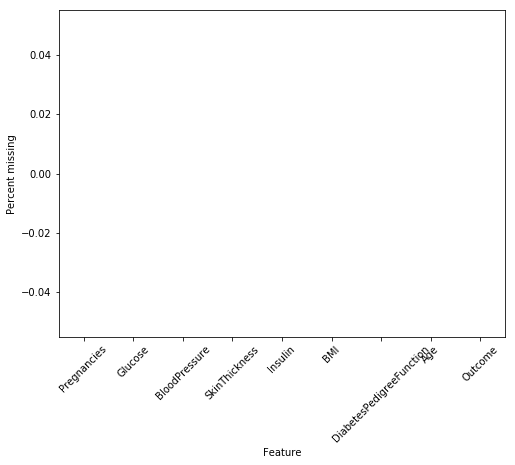

In [13]:
null_vals = mydf_train_valid.isnull().sum()/len(mydf_train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [14]:
import missingno

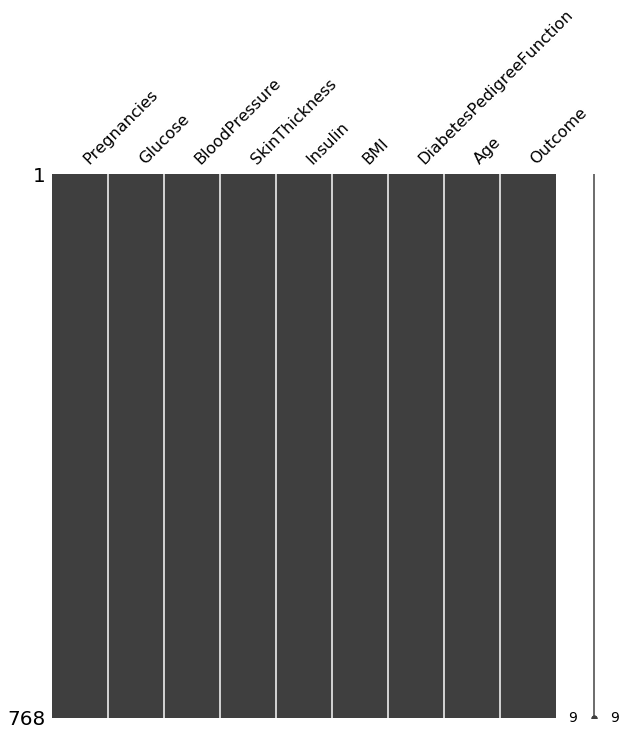

In [15]:
missingno.matrix(my_df, figsize = (10,10))

In [16]:
mydf_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 9 columns):
Pregnancies                 652 non-null int64
Glucose                     652 non-null int64
BloodPressure               652 non-null int64
SkinThickness               652 non-null int64
Insulin                     652 non-null int64
BMI                         652 non-null float64
DiabetesPedigreeFunction    652 non-null float64
Age                         652 non-null int64
Outcome                     652 non-null int64
dtypes: float64(2), int64(7)
memory usage: 45.9 KB


In [17]:
Y = mydf_train_valid["Outcome"]
X = mydf_train_valid.drop(["Outcome"],axis = 1)

print(X.shape,Y.shape)

(652, 8) (652,)


In [18]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
X_train,X_valid = mydf_splitter(X,456)
Y_train,Y_valid = mydf_splitter(Y,456)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(456, 8) (196, 8) (456,) (196,)


# Build the deep neural network

In [20]:

model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


# Compile the DNN

In [21]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
score= list()
accuracy_list=list()
epoch=list()
batch= list()


for epoch in range (5,10):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=epoch)
    accuracy = model.evaluate(X_valid, Y_valid)
    accuracy_list.append(accuracy)
        
        

# Fit the DNN with your train data and Hyperparameter Tuning

In [24]:
Y_test = mydf_test["Outcome"]
X_test = mydf_test.drop(["Outcome"],axis = 1)

print(X.shape,Y.shape)

(652, 8) (652,)


In [25]:

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=100, batch_size=5)
for epoch in range (5,20):
    for batch in range(5,7):
        model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=epoch, batch_size=batch)
        scores = model.evaluate(X_valid, Y_valid)
        score.append(scores)
        print ("Accuracy: %.2f%%" %(scores[1]*100))

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 456 samples, validate on 116 samples
Epoch 1/100
456/456 [==============================] - 2s 4ms/step - loss: 0.6904 - acc: 0.5943 - val_loss: 0.6882 - val_acc: 0.6121
Epoch 2/100
456/456 [==============================] - 0s 378us/step - loss: 0.6855 - acc: 0.6118 - val_loss: 0.6836 - val_acc: 0.6121
Epoch 3/100
456/456 [==============================] - 0s 370us/step - loss: 0.6821 - acc: 0.6162 - val_loss: 0.6814 - val_acc: 0.6121
Epoch 4/100
456/456 [==============================] - 0s 356us/step - loss: 0.6785 - acc: 0.6184 - val_loss: 0.6792 - val_acc: 0.6121
Epoch 5/100
456/456 [==============================] - 0s 359us/step - loss: 0.6761 - acc: 0.6184 - val_loss: 0.6762 - val_acc: 0.6379
Epoch 6/100
456/456 [==============================] - 0s 359us/step - loss: 0.6725 - acc: 0.6338 - val_loss: 0.6766 - val_acc: 0.6293
Epoch 7/100
456/456 [==============================] - 0s 375us/step - loss: 0.6716 - acc: 0.6294 - val_loss: 0.6748 - val_acc: 0.6293
Epoch 8/100

Epoch 61/100
456/456 [==============================] - 0s 336us/step - loss: 0.5513 - acc: 0.7171 - val_loss: 0.5629 - val_acc: 0.7414
Epoch 62/100
456/456 [==============================] - 0s 344us/step - loss: 0.5519 - acc: 0.7215 - val_loss: 0.5598 - val_acc: 0.7414
Epoch 63/100
456/456 [==============================] - 0s 352us/step - loss: 0.5584 - acc: 0.7039 - val_loss: 0.5598 - val_acc: 0.7414
Epoch 64/100
456/456 [==============================] - 0s 354us/step - loss: 0.5565 - acc: 0.7259 - val_loss: 0.5621 - val_acc: 0.7414
Epoch 65/100
456/456 [==============================] - 0s 361us/step - loss: 0.5530 - acc: 0.7281 - val_loss: 0.5739 - val_acc: 0.7241
Epoch 66/100
456/456 [==============================] - 0s 362us/step - loss: 0.5542 - acc: 0.7281 - val_loss: 0.5669 - val_acc: 0.7328
Epoch 67/100
456/456 [==============================] - 0s 346us/step - loss: 0.5568 - acc: 0.7149 - val_loss: 0.5634 - val_acc: 0.7414
Epoch 68/100
456/456 [==========================

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 301us/step - loss: 0.5269 - acc: 0.7478 - val_loss: 0.4559 - val_acc: 0.7908
Epoch 3/5
456/456 [==============================] - 0s 362us/step - loss: 0.5338 - acc: 0.7522 - val_loss: 0.5023 - val_acc: 0.7959
Epoch 4/5
456/456 [==============================] - 0s 381us/step - loss: 0.5324 - acc: 0.7346 - val_loss: 0.4981 - val_acc: 0.8061
Epoch 5/5
196/196 [==============================] - 0s 33us/step
Accuracy: 77.55%
Train on 456 samples, validate on 196 samples
Epoch 1/5
456/456 [==============================] - 0s 309us/step - loss: 0.5300 - acc: 0.7478 - val_loss: 0.4668 - val_acc: 0.8520
Epoch 2/5
  6/456 [..............................] - ETA: 0s - loss: 0.3775 - acc: 0.8333

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 317us/step - loss: 0.5282 - acc: 0.7456 - val_loss: 0.4536 - val_acc: 0.8367
Epoch 3/5
456/456 [==============================] - 0s 327us/step - loss: 0.5267 - acc: 0.7412 - val_loss: 0.4732 - val_acc: 0.8316
Epoch 4/5
456/456 [==============================] - 0s 317us/step - loss: 0.5270 - acc: 0.7478 - val_loss: 0.4826 - val_acc: 0.8163
Epoch 5/5
196/196 [==============================] - 0s 37us/step
Accuracy: 82.14%
Train on 456 samples, validate on 196 samples
Epoch 1/6
456/456 [==============================] - 0s 365us/step - loss: 0.5240 - acc: 0.7434 - val_loss: 0.4677 - val_acc: 0.8469
Epoch 2/6
  5/456 [..............................] - ETA: 0s - loss: 0.3495 - acc: 1.0000

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 355us/step - loss: 0.5387 - acc: 0.7390 - val_loss: 0.4605 - val_acc: 0.8520
Epoch 3/6
456/456 [==============================] - 0s 363us/step - loss: 0.5312 - acc: 0.7478 - val_loss: 0.4540 - val_acc: 0.8316
Epoch 4/6
456/456 [==============================] - 0s 392us/step - loss: 0.5283 - acc: 0.7697 - val_loss: 0.4616 - val_acc: 0.8469
Epoch 5/6
456/456 [==============================] - 0s 351us/step - loss: 0.5246 - acc: 0.7522 - val_loss: 0.4514 - val_acc: 0.8418
Epoch 6/6
196/196 [==============================] - 0s 44us/step
Accuracy: 82.65%
Train on 456 samples, validate on 196 samples
Epoch 1/6
456/456 [==============================] - 0s 314us/step - loss: 0.5200 - acc: 0.7522 - val_loss: 0.4597 - val_acc: 0.8469
Epoch 2/6
  6/456 [..............................] - ETA: 0s - loss: 0.2358 - acc: 1.0000

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 313us/step - loss: 0.5271 - acc: 0.7544 - val_loss: 0.4572 - val_acc: 0.8571
Epoch 3/6
456/456 [==============================] - 0s 317us/step - loss: 0.5207 - acc: 0.7544 - val_loss: 0.4571 - val_acc: 0.8571
Epoch 4/6
456/456 [==============================] - 0s 326us/step - loss: 0.5187 - acc: 0.7500 - val_loss: 0.4733 - val_acc: 0.8418
Epoch 5/6
456/456 [==============================] - 0s 331us/step - loss: 0.5246 - acc: 0.7434 - val_loss: 0.4619 - val_acc: 0.8469
Epoch 6/6
196/196 [==============================] - 0s 44us/step
Accuracy: 80.10%
Train on 456 samples, validate on 196 samples
Epoch 1/7
456/456 [==============================] - 0s 353us/step - loss: 0.5213 - acc: 0.7522 - val_loss: 0.4425 - val_acc: 0.8316
Epoch 2/7
  5/456 [..............................] - ETA: 0s - loss: 0.1902 - acc: 1.0000

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 379us/step - loss: 0.5174 - acc: 0.7522 - val_loss: 0.4794 - val_acc: 0.8061
Epoch 3/7
456/456 [==============================] - 0s 368us/step - loss: 0.5259 - acc: 0.7478 - val_loss: 0.4433 - val_acc: 0.8061
Epoch 4/7
456/456 [==============================] - 0s 421us/step - loss: 0.5211 - acc: 0.7456 - val_loss: 0.4669 - val_acc: 0.8469
Epoch 5/7
456/456 [==============================] - 0s 386us/step - loss: 0.5180 - acc: 0.7632 - val_loss: 0.4727 - val_acc: 0.8418
Epoch 6/7
456/456 [==============================] - 0s 385us/step - loss: 0.5206 - acc: 0.7544 - val_loss: 0.4653 - val_acc: 0.8520
Epoch 7/7
196/196 [==============================] - 0s 37us/step
Accuracy: 85.20%
Train on 456 samples, validate on 196 samples
Epoch 1/7
456/456 [==============================] - 0s 324us/step - loss: 0.5166 - acc: 0.7456 - val_loss: 0.4793 - val_acc: 0.8010
Epoch 2/7
  6/456 [..............................] - ETA: 0s - loss: 0.2405 - acc: 

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 322us/step - loss: 0.5200 - acc: 0.7434 - val_loss: 0.5185 - val_acc: 0.7908
Epoch 3/7
456/456 [==============================] - 0s 296us/step - loss: 0.5172 - acc: 0.7500 - val_loss: 0.4733 - val_acc: 0.8112
Epoch 4/7
456/456 [==============================] - 0s 320us/step - loss: 0.5208 - acc: 0.7544 - val_loss: 0.4475 - val_acc: 0.8469
Epoch 5/7
456/456 [==============================] - 0s 302us/step - loss: 0.5129 - acc: 0.7478 - val_loss: 0.4363 - val_acc: 0.8214
Epoch 6/7
456/456 [==============================] - 0s 303us/step - loss: 0.5180 - acc: 0.7544 - val_loss: 0.4469 - val_acc: 0.8520
Epoch 7/7
196/196 [==============================] - 0s 46us/step
Accuracy: 82.65%
Train on 456 samples, validate on 196 samples
Epoch 1/8
456/456 [==============================] - 0s 368us/step - loss: 0.5145 - acc: 0.7500 - val_loss: 0.4925 - val_acc: 0.8163
Epoch 2/8
  5/456 [..............................] - ETA: 0s - loss: 0.5453 - acc: 

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 377us/step - loss: 0.5168 - acc: 0.7500 - val_loss: 0.4484 - val_acc: 0.8469
Epoch 3/8
456/456 [==============================] - 0s 390us/step - loss: 0.5088 - acc: 0.7478 - val_loss: 0.4496 - val_acc: 0.8418
Epoch 4/8
456/456 [==============================] - 0s 398us/step - loss: 0.5145 - acc: 0.7632 - val_loss: 0.4524 - val_acc: 0.8469
Epoch 5/8
456/456 [==============================] - 0s 364us/step - loss: 0.5229 - acc: 0.7456 - val_loss: 0.4582 - val_acc: 0.8316
Epoch 6/8
456/456 [==============================] - 0s 352us/step - loss: 0.5109 - acc: 0.7478 - val_loss: 0.4365 - val_acc: 0.8163
Epoch 7/8
456/456 [==============================] - 0s 367us/step - loss: 0.5146 - acc: 0.7522 - val_loss: 0.4569 - val_acc: 0.8418
Epoch 8/8
196/196 [==============================] - 0s 41us/step
Accuracy: 85.20%
Train on 456 samples, validate on 196 samples
Epoch 1/8
456/456 [==============================] - 0s 312us/step - loss: 0.5124 -

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 332us/step - loss: 0.5123 - acc: 0.7456 - val_loss: 0.4406 - val_acc: 0.8418
Epoch 3/8
456/456 [==============================] - 0s 309us/step - loss: 0.5144 - acc: 0.7478 - val_loss: 0.4909 - val_acc: 0.8010
Epoch 4/8
456/456 [==============================] - 0s 303us/step - loss: 0.5184 - acc: 0.7390 - val_loss: 0.4428 - val_acc: 0.7959
Epoch 5/8
456/456 [==============================] - 0s 301us/step - loss: 0.5087 - acc: 0.7610 - val_loss: 0.4323 - val_acc: 0.8163
Epoch 6/8
456/456 [==============================] - 0s 317us/step - loss: 0.5116 - acc: 0.7434 - val_loss: 0.4609 - val_acc: 0.8367
Epoch 7/8
456/456 [==============================] - 0s 308us/step - loss: 0.5158 - acc: 0.7544 - val_loss: 0.4554 - val_acc: 0.8265
Epoch 8/8
196/196 [==============================] - 0s 41us/step
Accuracy: 79.59%
Train on 456 samples, validate on 196 samples
Epoch 1/9
456/456 [==============================] - 0s 370us/step - loss: 0.5106 -

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 360us/step - loss: 0.5163 - acc: 0.7522 - val_loss: 0.4385 - val_acc: 0.8469
Epoch 3/9
456/456 [==============================] - 0s 375us/step - loss: 0.5152 - acc: 0.7544 - val_loss: 0.4972 - val_acc: 0.7959
Epoch 4/9
456/456 [==============================] - 0s 366us/step - loss: 0.5100 - acc: 0.7434 - val_loss: 0.4448 - val_acc: 0.8418
Epoch 5/9
456/456 [==============================] - 0s 382us/step - loss: 0.5145 - acc: 0.7368 - val_loss: 0.4493 - val_acc: 0.8316
Epoch 6/9
456/456 [==============================] - 0s 377us/step - loss: 0.5196 - acc: 0.7412 - val_loss: 0.4377 - val_acc: 0.8316
Epoch 7/9
456/456 [==============================] - 0s 387us/step - loss: 0.5128 - acc: 0.7588 - val_loss: 0.4885 - val_acc: 0.8112
Epoch 8/9
456/456 [==============================] - 0s 373us/step - loss: 0.5161 - acc: 0.7325 - val_loss: 0.4730 - val_acc: 0.8214
Epoch 9/9
196/196 [==============================] - 0s 45us/step
Accuracy: 80.

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 291us/step - loss: 0.5060 - acc: 0.7544 - val_loss: 0.4374 - val_acc: 0.8265
Epoch 3/9
456/456 [==============================] - 0s 311us/step - loss: 0.5129 - acc: 0.7500 - val_loss: 0.4703 - val_acc: 0.8214
Epoch 4/9
456/456 [==============================] - 0s 302us/step - loss: 0.5064 - acc: 0.7654 - val_loss: 0.4571 - val_acc: 0.8214
Epoch 5/9
456/456 [==============================] - 0s 300us/step - loss: 0.5033 - acc: 0.7566 - val_loss: 0.4242 - val_acc: 0.8163
Epoch 6/9
456/456 [==============================] - 0s 302us/step - loss: 0.5002 - acc: 0.7544 - val_loss: 0.4376 - val_acc: 0.8418
Epoch 7/9
456/456 [==============================] - 0s 304us/step - loss: 0.5059 - acc: 0.7522 - val_loss: 0.4328 - val_acc: 0.8265
Epoch 8/9
456/456 [==============================] - 0s 306us/step - loss: 0.5061 - acc: 0.7544 - val_loss: 0.4257 - val_acc: 0.8163
Epoch 9/9
196/196 [==============================] - 0s 34us/step
Accuracy: 81.

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 384us/step - loss: 0.5052 - acc: 0.7675 - val_loss: 0.4243 - val_acc: 0.8112
Epoch 3/10
456/456 [==============================] - 0s 366us/step - loss: 0.4974 - acc: 0.7588 - val_loss: 0.4298 - val_acc: 0.8367
Epoch 4/10
456/456 [==============================] - 0s 374us/step - loss: 0.5096 - acc: 0.7632 - val_loss: 0.4236 - val_acc: 0.8418
Epoch 5/10
456/456 [==============================] - 0s 378us/step - loss: 0.5273 - acc: 0.7412 - val_loss: 0.4396 - val_acc: 0.8214
Epoch 6/10
456/456 [==============================] - 0s 365us/step - loss: 0.5065 - acc: 0.7675 - val_loss: 0.4349 - val_acc: 0.8265
Epoch 7/10
456/456 [==============================] - 0s 382us/step - loss: 0.5166 - acc: 0.7456 - val_loss: 0.4466 - val_acc: 0.8418
Epoch 8/10
456/456 [==============================] - 0s 382us/step - loss: 0.5095 - acc: 0.7434 - val_loss: 0.4363 - val_acc: 0.8367
Epoch 9/10
456/456 [==============================] - 0s 375us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 296us/step - loss: 0.5093 - acc: 0.7478 - val_loss: 0.4351 - val_acc: 0.8061
Epoch 3/10
456/456 [==============================] - ETA: 0s - loss: 0.4901 - acc: 0.780 - 0s 307us/step - loss: 0.5021 - acc: 0.7697 - val_loss: 0.4270 - val_acc: 0.8418
Epoch 4/10
456/456 [==============================] - 0s 318us/step - loss: 0.4996 - acc: 0.7456 - val_loss: 0.4433 - val_acc: 0.8214
Epoch 5/10
456/456 [==============================] - 0s 301us/step - loss: 0.5099 - acc: 0.7390 - val_loss: 0.4189 - val_acc: 0.8061
Epoch 6/10
456/456 [==============================] - 0s 305us/step - loss: 0.4953 - acc: 0.7632 - val_loss: 0.4733 - val_acc: 0.8418
Epoch 7/10
456/456 [==============================] - 0s 315us/step - loss: 0.4966 - acc: 0.7610 - val_loss: 0.4165 - val_acc: 0.8214
Epoch 8/10
456/456 [==============================] - 0s 309us/step - loss: 0.4947 - acc: 0.7478 - val_loss: 0.4406 - val_acc: 0.8316
Epoch 9/10
456/456 [===============

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 366us/step - loss: 0.5012 - acc: 0.7654 - val_loss: 0.4132 - val_acc: 0.8163
Epoch 2/11
456/456 [==============================] - 0s 419us/step - loss: 0.5007 - acc: 0.7303 - val_loss: 0.4190 - val_acc: 0.8316
Epoch 3/11
456/456 [==============================] - 0s 559us/step - loss: 0.5013 - acc: 0.7522 - val_loss: 0.4401 - val_acc: 0.8265
Epoch 4/11
456/456 [==============================] - 0s 580us/step - loss: 0.5017 - acc: 0.7566 - val_loss: 0.4254 - val_acc: 0.8265
Epoch 5/11
456/456 [==============================] - 0s 414us/step - loss: 0.5025 - acc: 0.7632 - val_loss: 0.4266 - val_acc: 0.8061
Epoch 6/11
456/456 [==============================] - 0s 420us/step - loss: 0.5051 - acc: 0.7390 - val_loss: 0.4300 - val_acc: 0.8061
Epoch 7/11
456/456 [==============================] - 0s 350us/step - loss: 0.5025 - acc: 0.7697 - val_loss: 0.4236 - val_acc: 0.8316
Epoch 8/11
456/456 [==============================] - 0s 377us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 317us/step - loss: 0.4846 - acc: 0.7741 - val_loss: 0.4201 - val_acc: 0.8163
Epoch 3/11
456/456 [==============================] - 0s 307us/step - loss: 0.5232 - acc: 0.7588 - val_loss: 0.4445 - val_acc: 0.8367
Epoch 4/11
456/456 [==============================] - ETA: 0s - loss: 0.4918 - acc: 0.757 - 0s 320us/step - loss: 0.4975 - acc: 0.7544 - val_loss: 0.4392 - val_acc: 0.8316
Epoch 5/11
456/456 [==============================] - ETA: 0s - loss: 0.5139 - acc: 0.746 - 0s 305us/step - loss: 0.5032 - acc: 0.7522 - val_loss: 0.4279 - val_acc: 0.8316
Epoch 6/11
456/456 [==============================] - 0s 314us/step - loss: 0.4914 - acc: 0.7610 - val_loss: 0.4197 - val_acc: 0.8112
Epoch 7/11
456/456 [==============================] - 0s 309us/step - loss: 0.4968 - acc: 0.7368 - val_loss: 0.4304 - val_acc: 0.8265
Epoch 8/11
456/456 [==============================] - 0s 307us/step - loss: 0.4978 - acc: 0.7610 - val_loss: 0.4172 - val_acc: 0.82

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 385us/step - loss: 0.4927 - acc: 0.7632 - val_loss: 0.4614 - val_acc: 0.8418
Epoch 2/12
456/456 [==============================] - 0s 385us/step - loss: 0.4972 - acc: 0.7654 - val_loss: 0.4602 - val_acc: 0.8214
Epoch 3/12
456/456 [==============================] - 0s 427us/step - loss: 0.5129 - acc: 0.7566 - val_loss: 0.4812 - val_acc: 0.8214
Epoch 4/12
456/456 [==============================] - 0s 436us/step - loss: 0.4947 - acc: 0.7610 - val_loss: 0.4757 - val_acc: 0.8520
Epoch 5/12
456/456 [==============================] - 0s 419us/step - loss: 0.4972 - acc: 0.7456 - val_loss: 0.5397 - val_acc: 0.8061
Epoch 6/12
456/456 [==============================] - 0s 362us/step - loss: 0.5068 - acc: 0.7456 - val_loss: 0.4512 - val_acc: 0.8265
Epoch 7/12
456/456 [==============================] - 0s 393us/step - loss: 0.4949 - acc: 0.7522 - val_loss: 0.4352 - val_acc: 0.8265
Epoch 8/12
456/456 [==============================] - 0s 473us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 302us/step - loss: 0.4924 - acc: 0.7544 - val_loss: 0.4625 - val_acc: 0.8418
Epoch 3/12
456/456 [==============================] - 0s 319us/step - loss: 0.4858 - acc: 0.7654 - val_loss: 0.4211 - val_acc: 0.8163
Epoch 4/12
456/456 [==============================] - 0s 312us/step - loss: 0.4949 - acc: 0.7566 - val_loss: 0.4636 - val_acc: 0.8367
Epoch 5/12
456/456 [==============================] - 0s 298us/step - loss: 0.4853 - acc: 0.7632 - val_loss: 0.4189 - val_acc: 0.8112
Epoch 6/12
456/456 [==============================] - 0s 314us/step - loss: 0.4913 - acc: 0.7654 - val_loss: 0.4960 - val_acc: 0.8163
Epoch 7/12
456/456 [==============================] - 0s 305us/step - loss: 0.4856 - acc: 0.7434 - val_loss: 0.4280 - val_acc: 0.8061
Epoch 8/12
456/456 [==============================] - 0s 299us/step - loss: 0.4867 - acc: 0.7697 - val_loss: 0.4237 - val_acc: 0.8367
Epoch 9/12
456/456 [==============================] - 0s 310us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 377us/step - loss: 0.4878 - acc: 0.7632 - val_loss: 0.4316 - val_acc: 0.8265
Epoch 3/13
456/456 [==============================] - 0s 409us/step - loss: 0.4926 - acc: 0.7588 - val_loss: 0.4969 - val_acc: 0.8112
Epoch 4/13
456/456 [==============================] - 0s 444us/step - loss: 0.4910 - acc: 0.7544 - val_loss: 0.4307 - val_acc: 0.8265
Epoch 5/13
456/456 [==============================] - 0s 363us/step - loss: 0.4887 - acc: 0.7675 - val_loss: 0.4127 - val_acc: 0.8061
Epoch 6/13
456/456 [==============================] - 0s 369us/step - loss: 0.4944 - acc: 0.7522 - val_loss: 0.4551 - val_acc: 0.8316
Epoch 7/13
456/456 [==============================] - 0s 362us/step - loss: 0.4825 - acc: 0.7675 - val_loss: 0.4455 - val_acc: 0.8367
Epoch 8/13
456/456 [==============================] - 0s 369us/step - loss: 0.4840 - acc: 0.7500 - val_loss: 0.4233 - val_acc: 0.8061
Epoch 9/13
456/456 [==============================] - 0s 373us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 317us/step - loss: 0.4870 - acc: 0.7478 - val_loss: 0.4382 - val_acc: 0.8367
Epoch 3/13
456/456 [==============================] - 0s 321us/step - loss: 0.4812 - acc: 0.7610 - val_loss: 0.4303 - val_acc: 0.8316
Epoch 4/13
456/456 [==============================] - 0s 324us/step - loss: 0.4783 - acc: 0.7675 - val_loss: 0.4270 - val_acc: 0.8316
Epoch 5/13
456/456 [==============================] - 0s 300us/step - loss: 0.4823 - acc: 0.7632 - val_loss: 0.4450 - val_acc: 0.8367
Epoch 6/13
456/456 [==============================] - 0s 293us/step - loss: 0.4771 - acc: 0.7588 - val_loss: 0.4373 - val_acc: 0.8265
Epoch 7/13
456/456 [==============================] - 0s 317us/step - loss: 0.4866 - acc: 0.7610 - val_loss: 0.4243 - val_acc: 0.8367
Epoch 8/13
456/456 [==============================] - 0s 310us/step - loss: 0.4823 - acc: 0.7588 - val_loss: 0.4201 - val_acc: 0.8112
Epoch 9/13
456/456 [==============================] - 0s 320us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 425us/step - loss: 0.4995 - acc: 0.7500 - val_loss: 0.4799 - val_acc: 0.8265
Epoch 2/14
456/456 [==============================] - 0s 429us/step - loss: 0.4938 - acc: 0.7500 - val_loss: 0.4267 - val_acc: 0.8112
Epoch 3/14
456/456 [==============================] - 0s 434us/step - loss: 0.4795 - acc: 0.7478 - val_loss: 0.4481 - val_acc: 0.8418
Epoch 4/14
456/456 [==============================] - 0s 414us/step - loss: 0.4822 - acc: 0.7522 - val_loss: 0.4610 - val_acc: 0.8418
Epoch 5/14
456/456 [==============================] - 0s 368us/step - loss: 0.4917 - acc: 0.7456 - val_loss: 0.4336 - val_acc: 0.8316
Epoch 6/14
456/456 [==============================] - 0s 379us/step - loss: 0.5007 - acc: 0.7478 - val_loss: 0.4240 - val_acc: 0.8265
Epoch 7/14
456/456 [==============================] - 0s 364us/step - loss: 0.4797 - acc: 0.7434 - val_loss: 0.4208 - val_acc: 0.8112
Epoch 8/14
456/456 [==============================] - 0s 382us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 311us/step - loss: 0.4722 - acc: 0.7741 - val_loss: 0.4258 - val_acc: 0.8265
Epoch 3/14
456/456 [==============================] - 0s 309us/step - loss: 0.4739 - acc: 0.7566 - val_loss: 0.4410 - val_acc: 0.8520
Epoch 4/14
456/456 [==============================] - 0s 307us/step - loss: 0.4833 - acc: 0.7500 - val_loss: 0.4356 - val_acc: 0.8265
Epoch 5/14
456/456 [==============================] - 0s 310us/step - loss: 0.4787 - acc: 0.7675 - val_loss: 0.4604 - val_acc: 0.8265
Epoch 6/14
456/456 [==============================] - 0s 320us/step - loss: 0.4868 - acc: 0.7566 - val_loss: 0.4617 - val_acc: 0.8367
Epoch 7/14
456/456 [==============================] - 0s 308us/step - loss: 0.4694 - acc: 0.7719 - val_loss: 0.4196 - val_acc: 0.8214
Epoch 8/14
456/456 [==============================] - 0s 299us/step - loss: 0.4916 - acc: 0.7544 - val_loss: 0.5315 - val_acc: 0.8061
Epoch 9/14
456/456 [==============================] - 0s 303us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 397us/step - loss: 0.4762 - acc: 0.7851 - val_loss: 0.4228 - val_acc: 0.8112
Epoch 2/15
456/456 [==============================] - 0s 410us/step - loss: 0.4745 - acc: 0.7632 - val_loss: 0.4236 - val_acc: 0.8112
Epoch 3/15
456/456 [==============================] - 0s 359us/step - loss: 0.4885 - acc: 0.7522 - val_loss: 0.4152 - val_acc: 0.8112
Epoch 4/15
456/456 [==============================] - 0s 378us/step - loss: 0.4796 - acc: 0.7632 - val_loss: 0.4273 - val_acc: 0.8265
Epoch 5/15
456/456 [==============================] - 0s 375us/step - loss: 0.4817 - acc: 0.7588 - val_loss: 0.4352 - val_acc: 0.8265
Epoch 6/15
456/456 [==============================] - 0s 374us/step - loss: 0.4628 - acc: 0.7697 - val_loss: 0.4991 - val_acc: 0.8214
Epoch 7/15
456/456 [==============================] - 0s 349us/step - loss: 0.5000 - acc: 0.7478 - val_loss: 0.4223 - val_acc: 0.8214
Epoch 8/15
456/456 [==============================] - 0s 365us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 314us/step - loss: 0.4664 - acc: 0.7785 - val_loss: 0.4204 - val_acc: 0.8265
Epoch 3/15
456/456 [==============================] - 0s 315us/step - loss: 0.4666 - acc: 0.7741 - val_loss: 0.4316 - val_acc: 0.8367
Epoch 4/15
456/456 [==============================] - 0s 299us/step - loss: 0.4823 - acc: 0.7632 - val_loss: 0.4645 - val_acc: 0.8214
Epoch 5/15
456/456 [==============================] - 0s 347us/step - loss: 0.4721 - acc: 0.7566 - val_loss: 0.4767 - val_acc: 0.8214
Epoch 6/15
456/456 [==============================] - 0s 309us/step - loss: 0.4664 - acc: 0.7785 - val_loss: 0.4275 - val_acc: 0.8265
Epoch 7/15
456/456 [==============================] - 0s 315us/step - loss: 0.4689 - acc: 0.7566 - val_loss: 0.4576 - val_acc: 0.8316
Epoch 8/15
456/456 [==============================] - 0s 321us/step - loss: 0.4735 - acc: 0.7610 - val_loss: 0.4206 - val_acc: 0.8163
Epoch 9/15
456/456 [==============================] - 0s 322us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 365us/step - loss: 0.4908 - acc: 0.7412 - val_loss: 0.4144 - val_acc: 0.7959
Epoch 3/16
456/456 [==============================] - 0s 372us/step - loss: 0.4808 - acc: 0.7632 - val_loss: 0.4706 - val_acc: 0.8367
Epoch 4/16
456/456 [==============================] - 0s 360us/step - loss: 0.4714 - acc: 0.7654 - val_loss: 0.4136 - val_acc: 0.8112
Epoch 5/16
456/456 [==============================] - 0s 361us/step - loss: 0.4717 - acc: 0.7588 - val_loss: 0.4152 - val_acc: 0.8214
Epoch 6/16
456/456 [==============================] - 0s 351us/step - loss: 0.4727 - acc: 0.7675 - val_loss: 0.4327 - val_acc: 0.8316
Epoch 7/16
456/456 [==============================] - 0s 361us/step - loss: 0.4826 - acc: 0.7763 - val_loss: 0.4243 - val_acc: 0.8112
Epoch 8/16
456/456 [==============================] - 0s 367us/step - loss: 0.4717 - acc: 0.7807 - val_loss: 0.4229 - val_acc: 0.8163
Epoch 9/16
456/456 [==============================] - 0s 365us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 293us/step - loss: 0.4682 - acc: 0.7697 - val_loss: 0.4487 - val_acc: 0.8316
Epoch 3/16
456/456 [==============================] - 0s 313us/step - loss: 0.4761 - acc: 0.7741 - val_loss: 0.4572 - val_acc: 0.8265
Epoch 4/16
456/456 [==============================] - 0s 313us/step - loss: 0.4702 - acc: 0.7566 - val_loss: 0.4457 - val_acc: 0.8265
Epoch 5/16
456/456 [==============================] - 0s 304us/step - loss: 0.4624 - acc: 0.7632 - val_loss: 0.4227 - val_acc: 0.8112
Epoch 6/16
456/456 [==============================] - 0s 320us/step - loss: 0.4603 - acc: 0.7741 - val_loss: 0.4228 - val_acc: 0.8163
Epoch 7/16
456/456 [==============================] - 0s 330us/step - loss: 0.4601 - acc: 0.7675 - val_loss: 0.4476 - val_acc: 0.8418
Epoch 8/16
456/456 [==============================] - 0s 316us/step - loss: 0.4656 - acc: 0.7807 - val_loss: 0.4206 - val_acc: 0.8163
Epoch 9/16
456/456 [==============================] - 0s 307us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 397us/step - loss: 0.4694 - acc: 0.7610 - val_loss: 0.4867 - val_acc: 0.8214
Epoch 3/17
456/456 [==============================] - 0s 375us/step - loss: 0.4874 - acc: 0.7610 - val_loss: 0.4713 - val_acc: 0.8214
Epoch 4/17
456/456 [==============================] - 0s 366us/step - loss: 0.4640 - acc: 0.7763 - val_loss: 0.4201 - val_acc: 0.8214
Epoch 5/17
456/456 [==============================] - 0s 378us/step - loss: 0.4709 - acc: 0.7829 - val_loss: 0.4199 - val_acc: 0.8265
Epoch 6/17
456/456 [==============================] - 0s 365us/step - loss: 0.4626 - acc: 0.7632 - val_loss: 0.4200 - val_acc: 0.8010
Epoch 7/17
456/456 [==============================] - 0s 363us/step - loss: 0.4691 - acc: 0.7763 - val_loss: 0.4396 - val_acc: 0.8265
Epoch 8/17
456/456 [==============================] - 0s 360us/step - loss: 0.4624 - acc: 0.7697 - val_loss: 0.4409 - val_acc: 0.8163
Epoch 9/17
456/456 [==============================] - 0s 356us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 298us/step - loss: 0.4581 - acc: 0.7763 - val_loss: 0.4384 - val_acc: 0.8316
Epoch 3/17
456/456 [==============================] - 0s 310us/step - loss: 0.4673 - acc: 0.7697 - val_loss: 0.4325 - val_acc: 0.8316
Epoch 4/17
456/456 [==============================] - 0s 309us/step - loss: 0.4562 - acc: 0.7632 - val_loss: 0.4250 - val_acc: 0.8112
Epoch 5/17
456/456 [==============================] - 0s 301us/step - loss: 0.4550 - acc: 0.7632 - val_loss: 0.4523 - val_acc: 0.8316
Epoch 6/17
456/456 [==============================] - 0s 304us/step - loss: 0.4589 - acc: 0.7719 - val_loss: 0.4278 - val_acc: 0.8163
Epoch 7/17
456/456 [==============================] - 0s 286us/step - loss: 0.4634 - acc: 0.7807 - val_loss: 0.4414 - val_acc: 0.8265
Epoch 8/17
456/456 [==============================] - 0s 309us/step - loss: 0.4631 - acc: 0.7632 - val_loss: 0.4528 - val_acc: 0.8265
Epoch 9/17
456/456 [==============================] - 0s 310us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 349us/step - loss: 0.4650 - acc: 0.7763 - val_loss: 0.4677 - val_acc: 0.8367
Epoch 3/18
456/456 [==============================] - 0s 355us/step - loss: 0.4630 - acc: 0.7741 - val_loss: 0.4649 - val_acc: 0.8316
Epoch 4/18
456/456 [==============================] - 0s 361us/step - loss: 0.4639 - acc: 0.7697 - val_loss: 0.4435 - val_acc: 0.8265
Epoch 5/18
456/456 [==============================] - 0s 368us/step - loss: 0.4547 - acc: 0.7588 - val_loss: 0.4915 - val_acc: 0.8265
Epoch 6/18
456/456 [==============================] - 0s 360us/step - loss: 0.4647 - acc: 0.7610 - val_loss: 0.4413 - val_acc: 0.8163
Epoch 7/18
456/456 [==============================] - 0s 372us/step - loss: 0.4682 - acc: 0.7632 - val_loss: 0.4490 - val_acc: 0.8265
Epoch 8/18
456/456 [==============================] - 0s 363us/step - loss: 0.4618 - acc: 0.7654 - val_loss: 0.4864 - val_acc: 0.8265
Epoch 9/18
456/456 [==============================] - 0s 354us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 311us/step - loss: 0.4557 - acc: 0.7610 - val_loss: 0.4391 - val_acc: 0.8214
Epoch 3/18
456/456 [==============================] - 0s 313us/step - loss: 0.4576 - acc: 0.7763 - val_loss: 0.4491 - val_acc: 0.8316
Epoch 4/18
456/456 [==============================] - 0s 322us/step - loss: 0.4624 - acc: 0.7500 - val_loss: 0.4464 - val_acc: 0.8163
Epoch 5/18
456/456 [==============================] - 0s 299us/step - loss: 0.4568 - acc: 0.7697 - val_loss: 0.4362 - val_acc: 0.8214
Epoch 6/18
456/456 [==============================] - 0s 304us/step - loss: 0.4563 - acc: 0.7610 - val_loss: 0.4550 - val_acc: 0.8367
Epoch 7/18
456/456 [==============================] - 0s 296us/step - loss: 0.4579 - acc: 0.7654 - val_loss: 0.4380 - val_acc: 0.8265
Epoch 8/18
456/456 [==============================] - 0s 286us/step - loss: 0.4606 - acc: 0.7654 - val_loss: 0.4518 - val_acc: 0.8316
Epoch 9/18
456/456 [==============================] - 0s 315us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 379us/step - loss: 0.4565 - acc: 0.7654 - val_loss: 0.4519 - val_acc: 0.8214
Epoch 2/19
456/456 [==============================] - 0s 375us/step - loss: 0.4537 - acc: 0.7763 - val_loss: 0.5584 - val_acc: 0.7806
Epoch 3/19
456/456 [==============================] - 0s 414us/step - loss: 0.4602 - acc: 0.7675 - val_loss: 0.5632 - val_acc: 0.7857
Epoch 4/19
456/456 [==============================] - 0s 398us/step - loss: 0.4744 - acc: 0.7697 - val_loss: 0.4642 - val_acc: 0.8418
Epoch 5/19
456/456 [==============================] - 0s 377us/step - loss: 0.4665 - acc: 0.7719 - val_loss: 0.4983 - val_acc: 0.8163
Epoch 6/19
456/456 [==============================] - 0s 422us/step - loss: 0.4628 - acc: 0.7632 - val_loss: 0.4283 - val_acc: 0.8214
Epoch 7/19
456/456 [==============================] - 0s 382us/step - loss: 0.4716 - acc: 0.7566 - val_loss: 0.4376 - val_acc: 0.8163
Epoch 8/19
456/456 [==============================] - 0s 374us/step - los

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


456/456 [==============================] - 0s 312us/step - loss: 0.4543 - acc: 0.7851 - val_loss: 0.4609 - val_acc: 0.8367
Epoch 3/19
456/456 [==============================] - 0s 328us/step - loss: 0.4558 - acc: 0.7654 - val_loss: 0.4481 - val_acc: 0.8214
Epoch 4/19
456/456 [==============================] - 0s 340us/step - loss: 0.4514 - acc: 0.7719 - val_loss: 0.4618 - val_acc: 0.8418
Epoch 5/19
456/456 [==============================] - 0s 353us/step - loss: 0.4491 - acc: 0.7741 - val_loss: 0.4706 - val_acc: 0.8316
Epoch 6/19
456/456 [==============================] - 0s 353us/step - loss: 0.4519 - acc: 0.7807 - val_loss: 0.4585 - val_acc: 0.8265
Epoch 7/19
456/456 [==============================] - 0s 320us/step - loss: 0.4608 - acc: 0.7654 - val_loss: 0.4940 - val_acc: 0.8163
Epoch 8/19
456/456 [==============================] - 0s 349us/step - loss: 0.4676 - acc: 0.7610 - val_loss: 0.4489 - val_acc: 0.8265
Epoch 9/19
456/456 [==============================] - 0s 365us/step - los

In [26]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=100, batch_size=5)

Train on 456 samples, validate on 116 samples
Epoch 1/100
456/456 [==============================] - 0s 375us/step - loss: 0.4693 - acc: 0.7610 - val_loss: 0.6188 - val_acc: 0.7155


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 2/100
456/456 [==============================] - 0s 412us/step - loss: 0.4800 - acc: 0.7654 - val_loss: 0.5836 - val_acc: 0.7500
Epoch 3/100
456/456 [==============================] - 0s 392us/step - loss: 0.4618 - acc: 0.7588 - val_loss: 0.6094 - val_acc: 0.7500
Epoch 4/100
456/456 [==============================] - 0s 343us/step - loss: 0.4581 - acc: 0.7654 - val_loss: 0.5786 - val_acc: 0.7414
Epoch 5/100
456/456 [==============================] - 0s 349us/step - loss: 0.4584 - acc: 0.7719 - val_loss: 0.5922 - val_acc: 0.7241
Epoch 6/100
456/456 [==============================] - 0s 383us/step - loss: 0.4566 - acc: 0.7588 - val_loss: 0.5931 - val_acc: 0.7500
Epoch 7/100
456/456 [==============================] - 0s 367us/step - loss: 0.4610 - acc: 0.7741 - val_loss: 0.6022 - val_acc: 0.7328
Epoch 8/100
456/456 [==============================] - 0s 393us/step - loss: 0.4563 - acc: 0.7544 - val_loss: 0.6184 - val_acc: 0.7241
Epoch 9/100
456/456 [==============================] - 

456/456 [==============================] - 0s 333us/step - loss: 0.4509 - acc: 0.7654 - val_loss: 0.6384 - val_acc: 0.7328
Epoch 63/100
456/456 [==============================] - 0s 329us/step - loss: 0.4589 - acc: 0.7741 - val_loss: 0.5825 - val_acc: 0.7586
Epoch 64/100
456/456 [==============================] - 0s 336us/step - loss: 0.4595 - acc: 0.7500 - val_loss: 0.6171 - val_acc: 0.7155
Epoch 65/100
456/456 [==============================] - 0s 365us/step - loss: 0.4512 - acc: 0.7719 - val_loss: 0.6135 - val_acc: 0.7328
Epoch 66/100
456/456 [==============================] - 0s 345us/step - loss: 0.4563 - acc: 0.7741 - val_loss: 0.5946 - val_acc: 0.7672
Epoch 67/100
456/456 [==============================] - 0s 365us/step - loss: 0.4503 - acc: 0.7697 - val_loss: 0.5998 - val_acc: 0.7328
Epoch 68/100
456/456 [==============================] - 0s 329us/step - loss: 0.4700 - acc: 0.7588 - val_loss: 0.5900 - val_acc: 0.7328
Epoch 69/100
456/456 [==============================] - 0s 34

# Epoch Vs Model Accuracy plots

## Evaluate the model

In [27]:

scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

116/116 [==============================] - 0s 56us/step
Accuracy: 74.14%


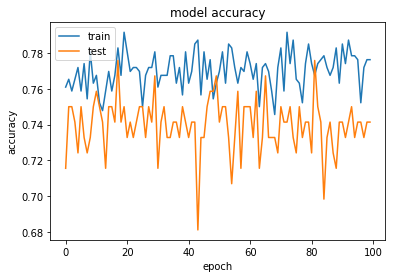

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

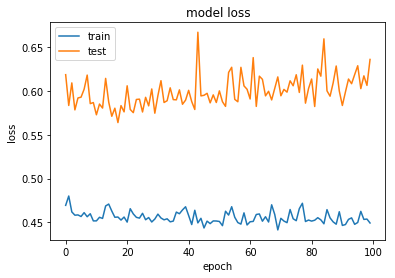

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# AUC and ROC curves

In [30]:
predict_probability = model.predict_proba(X_test)[:]

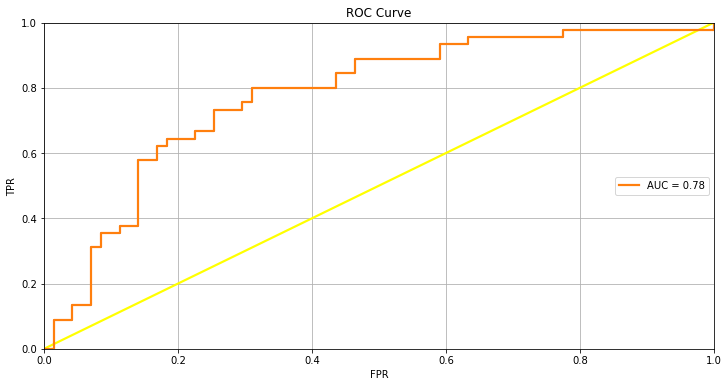

In [31]:
#Plotting ROC Curve and AUC value

from sklearn.metrics import roc_curve, auc

FPR, TPR, threshold = roc_curve(Y_test, predict_probability)

plt.figure(figsize=(12,6))
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1], [0,1], color = 'yellow', linewidth = 2.2)
plt.plot(FPR,TPR, linewidth = 2.2, label = 'AUC = %.2f' % auc(FPR,TPR))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc = "center right")

# Citations:
Dataset & Kernels: https://www.kaggle.com/uciml/pima-indians-diabetes-database/kernels

Video Reference 1:  https://www.youtube.com/results?search_query=auc+roc+curve+code+in+python+

Video Reference 2:https://www.youtube.com/watch?v=ErDgauqnTHk

# Conclusion:
a) Performed pre-processing of the data by scaling/standardizing the 8 columns
b) We have Splited the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-paraeters with validation data, and finally evaluated performance on the test data.

(c) Plotted Epoch versus train set accuracy, and validation set accuracy

(d) Reported results using nice ROC curves, report AUC values. Feel free to use code form our course, or from elsewhere

# License:
Copyright 2019 Nikhil Kashid

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.